## Final Project Submission

Please fill out:
* Student name: LYNN WANJIKU NDERO
* Student pace: full time
* Scheduled project review date/time: 1 WEEK
* Instructor name: ANTONNY MUIKO 
Presentation link : https://docs.google.com/presentation/d/1ZlQAi1Z28xvuozPVPxn7UfFtK87RZQouCMTwPfaP0o0/edit?usp=sharing

**PROJECT TITLE: HOME RENOVATIONS AND THEIR BENEFICIAL EFFECT ON HOME ESTIMATED VALUE**

**1. BUSINESS UNDERSTANDING**

Many homeowners face obstacles when it comes to home renovations resulting in outcomes such as delays, cost overrun among others.\
They may need a slight push for them to believe that home renovations can help them get the maximum estimated value of their homes.\
This is where real estate agency that help homeowners sell or/and buy houses comes in. The agency provides guidance on how renovating their homes can help them reach their objective of optimum home estimated value.

**DATA UNDERSTANDING**

We need to explore how increasing measures/sizes of various house features such as floors will increase the overall price of the house/s.\
This is by analysing the dataset provided by formulating the hypothesis of the project and building various regression models to aid in analysing the relationship between the dependable variable and independent variables.


**OBJECTIVE**

The main objective of the project is to determine how renovations od various features such as square footing of living area leads to an increase in home estimated values.

**2. Loading data**

Importing the relevant libraries

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
import scipy.stats
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Open 'Data/kc_house_data.csv' using pd.read_csv

In [4]:
data = pd.read_csv('Data/kc_house_data.csv', index_col=0)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


Open the 'Data/column_names.md' using os function

In [5]:
file_path = 'Data/column_names.md'

if os.path.isfile(file_path) and file_path.endswith('.md'):
    with open(file_path, 'r') as file:
        contents = file.read()
        print(contents)


# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

**3. DATA PREPARATION**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 1

In [7]:
data.shape

(21597, 20)

In [8]:
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [9]:
data['waterfront'].isna().sum()

2376

Determining the number of houses renovated by looking at the 'yr_renovated' column in the dataset

In [10]:
data['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

Dropping missing values

In [11]:
data.dropna(subset = 'yr_renovated', inplace = True)

In [12]:
#Dropping waterfront rows with missing values
data.dropna(subset = 'waterfront', inplace = True)

In [13]:
#Dropping view rows with missing values
data.dropna(subset = 'view', inplace = True)

In [14]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15762 entries, 6414100192 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15762 non-null  object 
 1   price          15762 non-null  float64
 2   bedrooms       15762 non-null  int64  
 3   bathrooms      15762 non-null  float64
 4   sqft_living    15762 non-null  int64  
 5   sqft_lot       15762 non-null  int64  
 6   floors         15762 non-null  float64
 7   waterfront     15762 non-null  object 
 8   view           15762 non-null  object 
 9   condition      15762 non-null  object 
 10  grade          15762 non-null  object 
 11  sqft_above     15762 non-null  int64  
 12  sqft_basement  15762 non-null  object 
 13  yr_built       15762 non-null  int64  
 14  yr_renovated   15762 non-null  float64
 15  zipcode        15762 non-null  int64  
 16  lat            15762 non-null  float64
 17  long           15762 non-null  float64
 1

Checking for duplicates

In [16]:
data.duplicated().sum()

0

Checking the rates of each house based on 'grade' column in the dataset

In [17]:
data['grade'].value_counts()

grade
7 Average        6539
8 Good           4438
9 Better         1920
6 Low Average    1482
10 Very Good      832
11 Excellent      290
5 Fair            167
12 Luxury          66
4 Low              16
13 Mansion         11
3 Poor              1
Name: count, dtype: int64

**Selecting the required features and placing it under data**

In [19]:
data_needed = data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','view','date','yr_renovated','sqft_above','sqft_basement']]
data_needed.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,view,date,yr_renovated,sqft_above,sqft_basement
id,,,,,,,,,,,,,,
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,NONE,12/9/2014,1991.0,2170,400.0
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,NONE,12/9/2014,0.0,1050,910.0
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,NONE,2/18/2015,0.0,1680,0.0
7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,NONE,5/12/2014,0.0,3890,1530.0
1321400060,257500.0,3,2.25,1715,6819,2.0,NO,Average,7 Average,NONE,6/27/2014,0.0,1715,?
2414600126,229500.0,3,1.00,1780,7470,1.0,NO,Average,7 Average,NONE,4/15/2015,0.0,1050,730.0
3793500160,323000.0,3,2.50,1890,6560,2.0,NO,Average,7 Average,NONE,3/12/2015,0.0,1890,0.0
9212900260,468000.0,2,1.00,1160,6000,1.0,NO,Good,7 Average,NONE,5/27/2014,0.0,860,300.0
6054650070,400000.0,3,1.75,1370,9680,1.0,NO,Good,7 Average,NONE,10/7/2014,0.0,1370,0.0


In [20]:
data_needed['waterfront'].value_counts()

waterfront
NO     15642
YES      120
Name: count, dtype: int64

In [21]:
data_needed['floors'].value_counts()

floors
1.0    7777
2.0    6049
1.5    1374
3.0     439
2.5     117
3.5       6
Name: count, dtype: int64

In [22]:
data_needed['bedrooms'].value_counts()

bedrooms
3     7120
4     5079
2     2003
5     1183
6      192
1      141
7       23
8       10
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [23]:
data_needed['bathrooms'].value_counts()

bathrooms
2.50    4004
1.00    2761
1.75    2226
2.25    1487
2.00    1395
1.50    1060
2.75     853
3.50     543
3.00     543
3.25     428
3.75     104
4.00     100
4.50      75
4.25      62
0.75      50
4.75      17
5.00      14
5.25      11
5.50       8
1.25       6
6.00       5
0.50       3
5.75       2
8.00       2
6.75       1
7.50       1
7.75       1
Name: count, dtype: int64

In [24]:
data_needed.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_renovated,sqft_above
count,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000
mean,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,82.440236,1792.775473
std,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,397.212626,828.403502
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,370.000000
25%,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,1200.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,1570.000000
75%,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,2220.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,9410.000000


Looking at correlation between 'price' and other variables:

In [25]:
data_needed[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_renovated','sqft_above']].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_renovated,sqft_above
price,1.000000,0.305489,0.526155,0.706189,0.084504,0.259505,0.122731,0.612014
bedrooms,0.305489,1.000000,0.512243,0.573575,0.025460,0.180485,0.017430,0.474272
bathrooms,0.526155,0.512243,1.000000,0.753846,0.080362,0.505187,0.046988,0.685677
sqft_living,0.706189,0.573575,0.753846,1.000000,0.165336,0.359407,0.050232,0.876176
sqft_lot,0.084504,0.025460,0.080362,0.165336,1.000000,-0.009924,0.002147,0.174216
floors,0.259505,0.180485,0.505187,0.359407,-0.009924,1.000000,-0.000720,0.529101
yr_renovated,0.122731,0.017430,0.046988,0.050232,0.002147,-0.000720,1.000000,0.018888
sqft_above,0.612014,0.474272,0.685677,0.876176,0.174216,0.529101,0.018888,1.000000


**3.2.FORMULATING HYPOTHESIS**

Null hypothesis: Home renovations does not increase the estimated value of houses.\
Alternative hypothesis: Home renovations does increase the estimated value of houses.

**4.MODELING**

**Baseline model**

Baseline model using 'sqftliving' attribute to predict the 'price' attribute

In [26]:
dummy_data_needed = pd.get_dummies(data_needed)
dummy_data_needed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_renovated,sqft_above,waterfront_NO,waterfront_YES,...,sqft_basement_920.0,sqft_basement_930.0,sqft_basement_935.0,sqft_basement_940.0,sqft_basement_950.0,sqft_basement_960.0,sqft_basement_970.0,sqft_basement_980.0,sqft_basement_990.0,sqft_basement_?
id,,,,,,,,,,,,,,,,,,,,,
6414100192,538000.0,3,2.25,2570,7242,2.0,1991.0,2170,True,False,...,False,False,False,False,False,False,False,False,False,False
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,1050,True,False,...,False,False,False,False,False,False,False,False,False,False
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,1680,True,False,...,False,False,False,False,False,False,False,False,False,False
7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3890,True,False,...,False,False,False,False,False,False,False,False,False,False
1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,1715,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,1180,True,False,...,False,False,False,False,False,False,False,False,False,False
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,1530,True,False,...,False,False,False,False,False,False,False,False,False,False
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,2310,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dummy_data_needed[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_renovated','sqft_above']].corr()

Sqft_living feature having the highest correlation of 0.706189. We shall use it to build a baseline model

In [27]:
#determining the y variable and the x variable and 
y_baseline = dummy_data_needed['price']
x_baseline = dummy_data_needed['sqft_living']
baseline_model = sm.OLS(y_baseline, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:18:34   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.516e+04   5205.744    -10.597      0.000   -6.54e+04    -4.5e+04
sqft_living   286.1494      2.285    125.214      0.000     281.670     290.629
==============================================================================
Omnibus:                    11136.965   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457340.013
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      28.739   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results:
1. The model explains about 50% variance in price.
2. The model is statistically significant overall with an F-statistic p-value below 0.05
2. The model's coefficients(const and sqft_living) are both statistically significant with a t-statictic p-values below 0.05
3. For an increase in sqft_living there is an associate increase in price by 286.15.
4. If sqft_living = 0, the price would be expected to be -55,160.00



**Baseline model visualization**

Plotting a graph of the actual vs predicted values

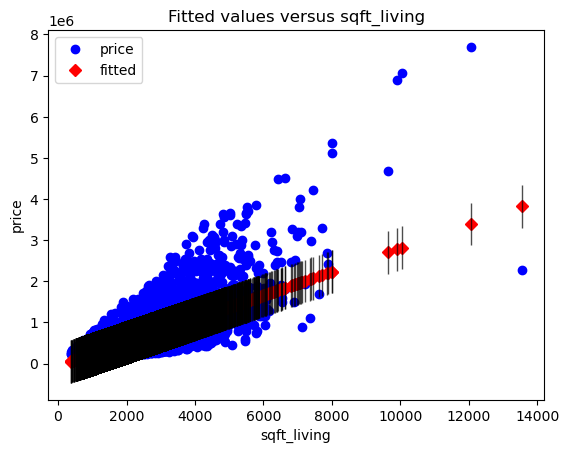

In [28]:
sm.graphics.plot_fit(baseline_results,'sqft_living')
plt.show()

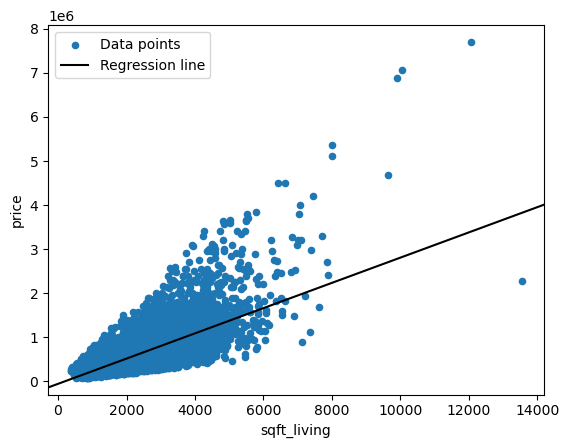

In [29]:
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y='price', label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

Plotting the residuals

In [30]:
baseline_results.resid

id
6414100192   -142239.154974
2487200875     98311.960983
1954400510     84433.784701
7237550310   -265764.860674
1321400060   -178081.443264
                  ...      
2997800021    155309.051757
263000018     -22643.809736
6600060120   -205840.318665
1523300141    165393.369179
1523300157     88292.369179
Length: 15762, dtype: float64

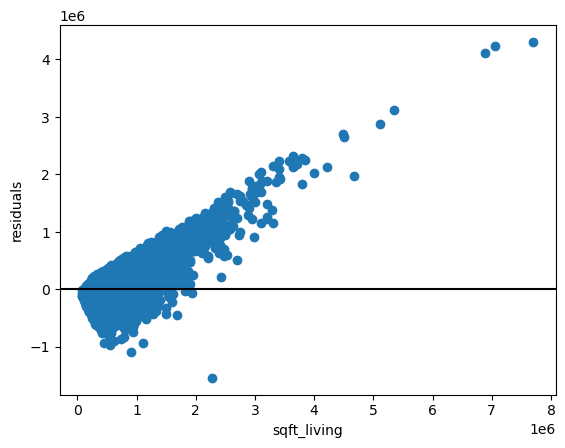

In [31]:
fig, ax = plt.subplots()

ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

**Second model**

We shall add another predictor variable 

In [32]:
dum2_data_needed = pd.get_dummies(data_needed)
dum2_data_needed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_renovated,sqft_above,waterfront_NO,waterfront_YES,...,sqft_basement_920.0,sqft_basement_930.0,sqft_basement_935.0,sqft_basement_940.0,sqft_basement_950.0,sqft_basement_960.0,sqft_basement_970.0,sqft_basement_980.0,sqft_basement_990.0,sqft_basement_?
id,,,,,,,,,,,,,,,,,,,,,
6414100192,538000.0,3,2.25,2570,7242,2.0,1991.0,2170,True,False,...,False,False,False,False,False,False,False,False,False,False
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,1050,True,False,...,False,False,False,False,False,False,False,False,False,False
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,1680,True,False,...,False,False,False,False,False,False,False,False,False,False
7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3890,True,False,...,False,False,False,False,False,False,False,False,False,False
1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,1715,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,1180,True,False,...,False,False,False,False,False,False,False,False,False,False
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,1530,True,False,...,False,False,False,False,False,False,False,False,False,False
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,2310,True,False,...,False,False,False,False,False,False,False,False,False,False


Sqft_living, sqft_above features have the highest correlations of 0.706189 and 0.612014 respectively. 

In [33]:
x = dum2_data_needed[['sqft_living','sqft_above']]
x


,sqft_living,sqft_above
id,,
6414100192,2570,2170
2487200875,1960,1050
1954400510,1680,1680
7237550310,5420,3890
1321400060,1715,1715
...,...,...
2997800021,1310,1180
263000018,1530,1530
6600060120,2310,2310


In [34]:
y = dum2_data_needed['price']
second_model = sm.OLS(y, sm.add_constant(x))
second_results = second_model.fit()
second_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     7845.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:19:18   Log-Likelihood:            -2.1910e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15759   BIC:                         4.382e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.327e+04   5260.979    -10.125      0.000   -6.36e+04    -4.3e+04
sqft_living   296.4372      4.741     62.532      0.000     287.145     305.729
sqft_above    -13.0205      5.257     -2.477      0.013     -23.324      -2.717
==============================================================================
Omnibus:                    11124.255   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           456859.299
Skew:                           2.905   Prob(JB):                         0.00
Kurtosis:                      28.727   Cond. No.                     7.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results:
1. The model is statistically significant overall, with an F-statistic p-value well below 0.05
1. The model explains about 50% variance in price.
2. The model coefficients(const, sqft_living and sqt_above) are statistically significant with a t-statictic p-values below 0.05
3. For an increase in sqft_living there is an associate increase in price by 296.44.\
   We see that there is an increase from the previous model therefore showing that sqft_above has a meaningful confounding in      the relationship between both sqft_living and price.
4. For an increase of 1 sqft_above, there is an associate decrease in price by -13.02.


**Second model Linear regression interpetation**

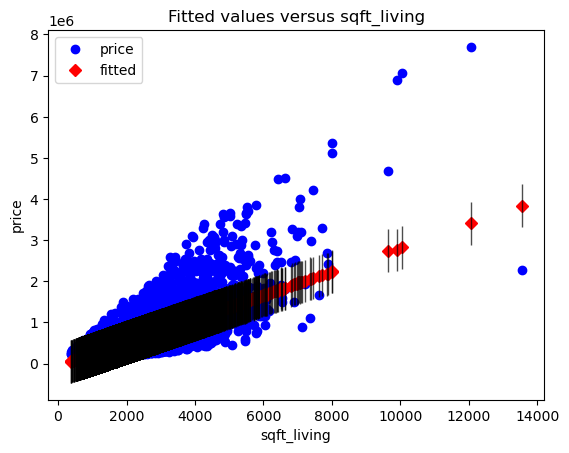

In [35]:
sm.graphics.plot_fit(second_results,'sqft_living')
plt.show()

The red dots are in a perfect fitted line that is similar to the baseline model therefore showing the predictions were made from both the model and the predictors.

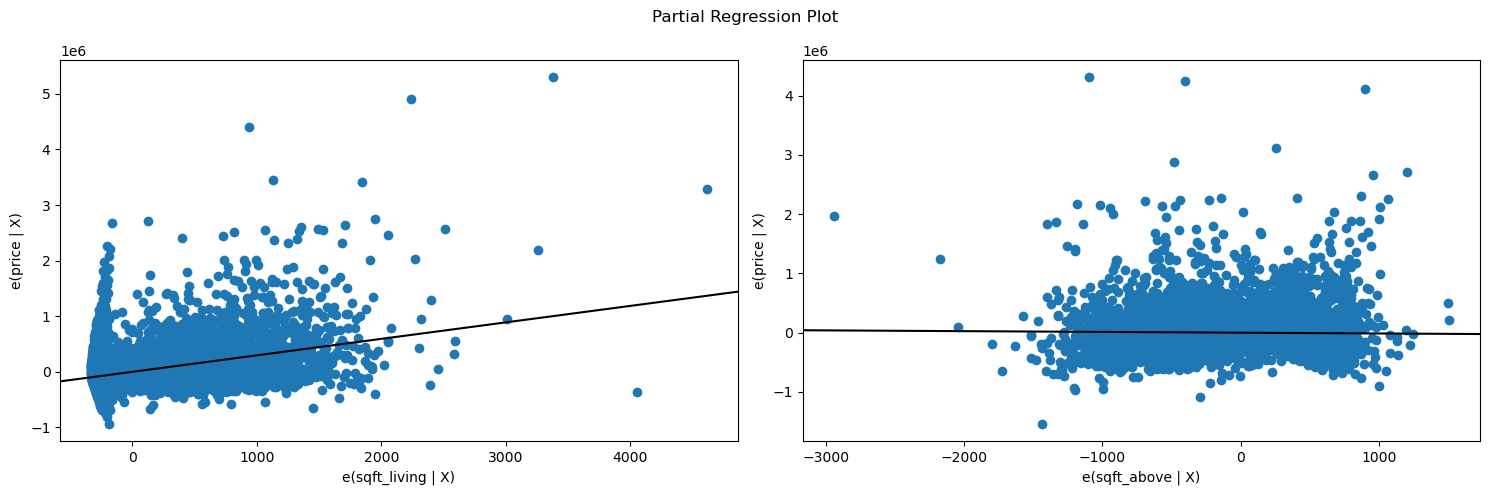

In [36]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["sqft_living", "sqft_above"], fig=fig)
plt.tight_layout()
plt.show()

The graphs show a linear relationship with non zero slope of the sqft_living predictor, showing an increase in square foot leads to an increase in price while there is a linear relationship with zero slope of the sqft_above.

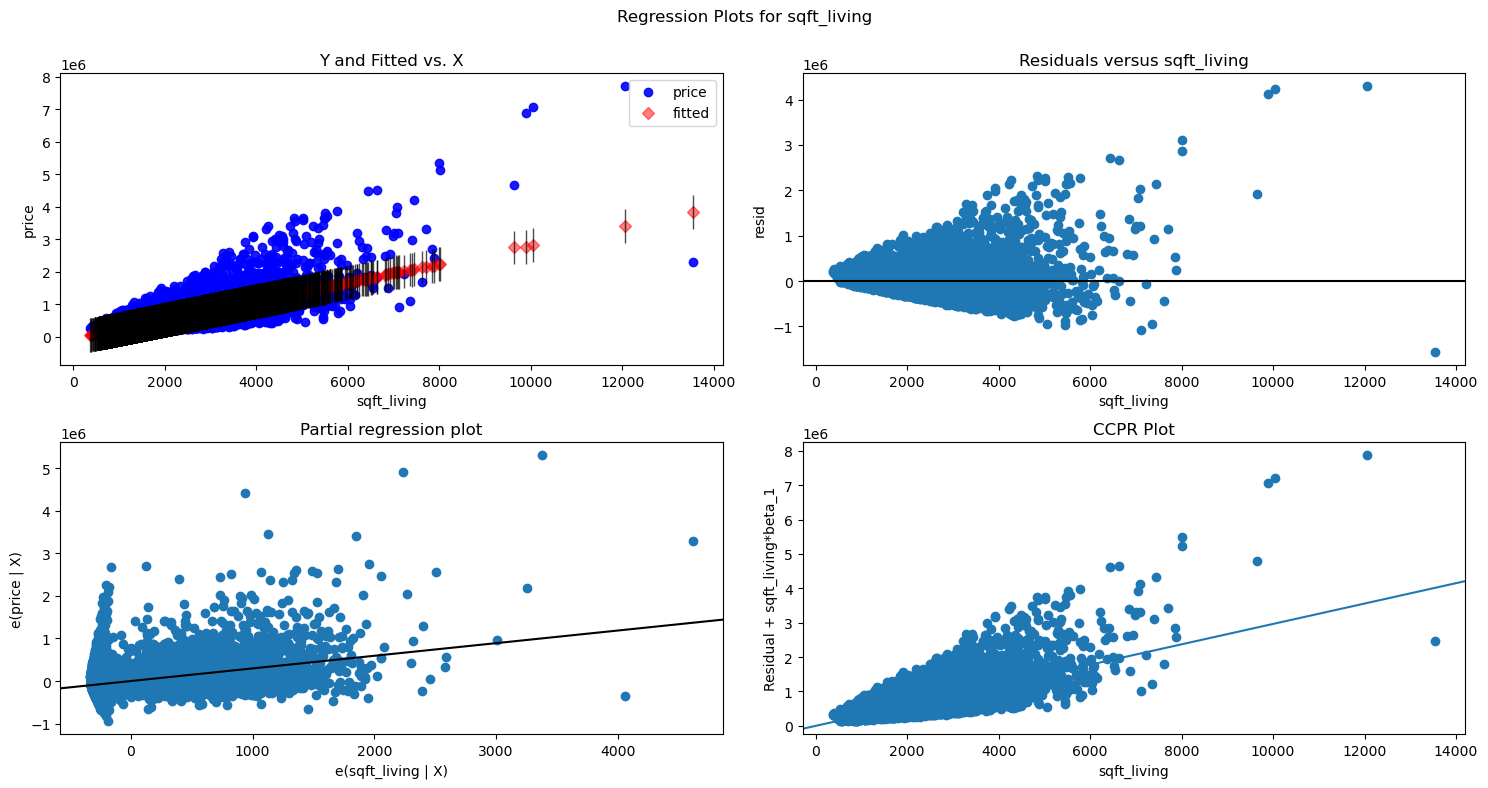

In [37]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results, "sqft_living", fig=fig)
plt.show()

From the graphs above we see that there is a linear relationship with non zero slopes in sqft_living predictor in regard to both the partial regression plot and CCPR plot. However, there is a linear relationship with zero slope visualized in residuals vs sqft_living plot.

**Multiple Linear regression using more features**

In [38]:
dum3_data_needed = pd.get_dummies(data_needed)
dum3_data_needed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_renovated,sqft_above,waterfront_NO,waterfront_YES,...,sqft_basement_920.0,sqft_basement_930.0,sqft_basement_935.0,sqft_basement_940.0,sqft_basement_950.0,sqft_basement_960.0,sqft_basement_970.0,sqft_basement_980.0,sqft_basement_990.0,sqft_basement_?
id,,,,,,,,,,,,,,,,,,,,,
6414100192,538000.0,3,2.25,2570,7242,2.0,1991.0,2170,True,False,...,False,False,False,False,False,False,False,False,False,False
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,1050,True,False,...,False,False,False,False,False,False,False,False,False,False
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,1680,True,False,...,False,False,False,False,False,False,False,False,False,False
7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3890,True,False,...,False,False,False,False,False,False,False,False,False,False
1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,1715,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,1180,True,False,...,False,False,False,False,False,False,False,False,False,False
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,1530,True,False,...,False,False,False,False,False,False,False,False,False,False
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,2310,True,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
x_all = dum3_data_needed.drop("price", axis=1).select_dtypes("number")
x_all

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_renovated,sqft_above
id,,,,,,,
6414100192,3,2.25,2570,7242,2.0,1991.0,2170
2487200875,4,3.00,1960,5000,1.0,0.0,1050
1954400510,3,2.00,1680,8080,1.0,0.0,1680
7237550310,4,4.50,5420,101930,1.0,0.0,3890
1321400060,3,2.25,1715,6819,2.0,0.0,1715
...,...,...,...,...,...,...,...
2997800021,3,2.50,1310,1294,2.0,0.0,1180
263000018,3,2.50,1530,1131,3.0,0.0,1530
6600060120,4,2.50,2310,5813,2.0,0.0,2310


In [40]:
third_model = sm.OLS(y, sm.add_constant(x_all))
third_results = third_model.fit()

third_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     2467.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:20:08   Log-Likelihood:            -2.1871e+05
No. Observations:               15762   AIC:                         4.374e+05
Df Residuals:                   15754   BIC:                         4.375e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.731e+04   9055.678      7.433      0.000    4.96e+04    8.51e+04
bedrooms       -6.1e+04   2728.056    -22.359      0.000   -6.63e+04   -5.56e+04
bathrooms     2525.9420   4500.192      0.561      0.575   -6294.951    1.13e+04
sqft_living    334.9997      5.802     57.735      0.000     323.626     346.373
sqft_lot        -0.3679      0.050     -7.317      0.000      -0.467      -0.269
floors        6672.9219   5070.678      1.316      0.188   -3266.188    1.66e+04
yr_renovated    79.2145      5.172     15.316      0.000      69.077      89.352
sqft_above     -19.2082      5.924     -3.242      0.001     -30.820      -7.596
==============================================================================
Omnibus:                    10689.805   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           392864.313
Skew:                           2.770   Prob(JB):                         0.00
Kurtosis:                      26.822   Cond. No.                     2.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results:
1. The model is statistically significant with a F-statistic p-value below 0.05
2. The model explains a 52.3% variance in price
   The R-squared increased by 2.3%
3. Most of the model coefficients are statistically significant:
   const, bedrooms, sqft_living, sqft_lot, yr_renovated and sqft_above have p-values below 0.05.
   bathrooms and floors have a coefficient greater than 0.05 meaning they have no effect on price thus statistically insignificant.
4. For an increase in sqft_living there is an associate increase in price by 335.\
   We see that there is an increase from the previous model therefore showing that other features have a meaningful confounding in the relationship between both sqft_living,sqft_above and price.

**Third model linear regression interpretation visualization**

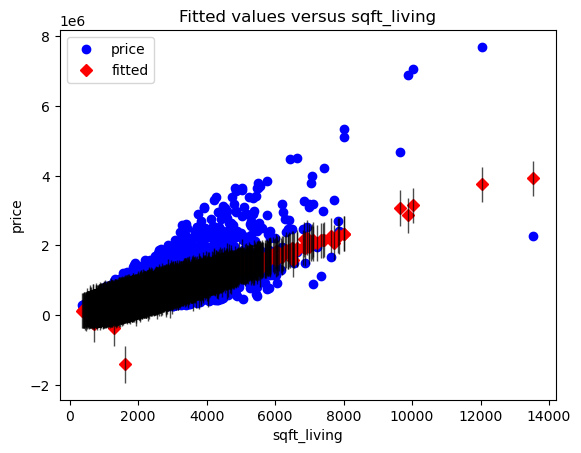

In [41]:
sm.graphics.plot_fit(third_results,'sqft_living')
plt.show()

The true blue and the predicted red values with the predictor being sqft_living show that the predicted values are not in a perfect line thus resulting to predictions being solely made based on the model and not the predictor

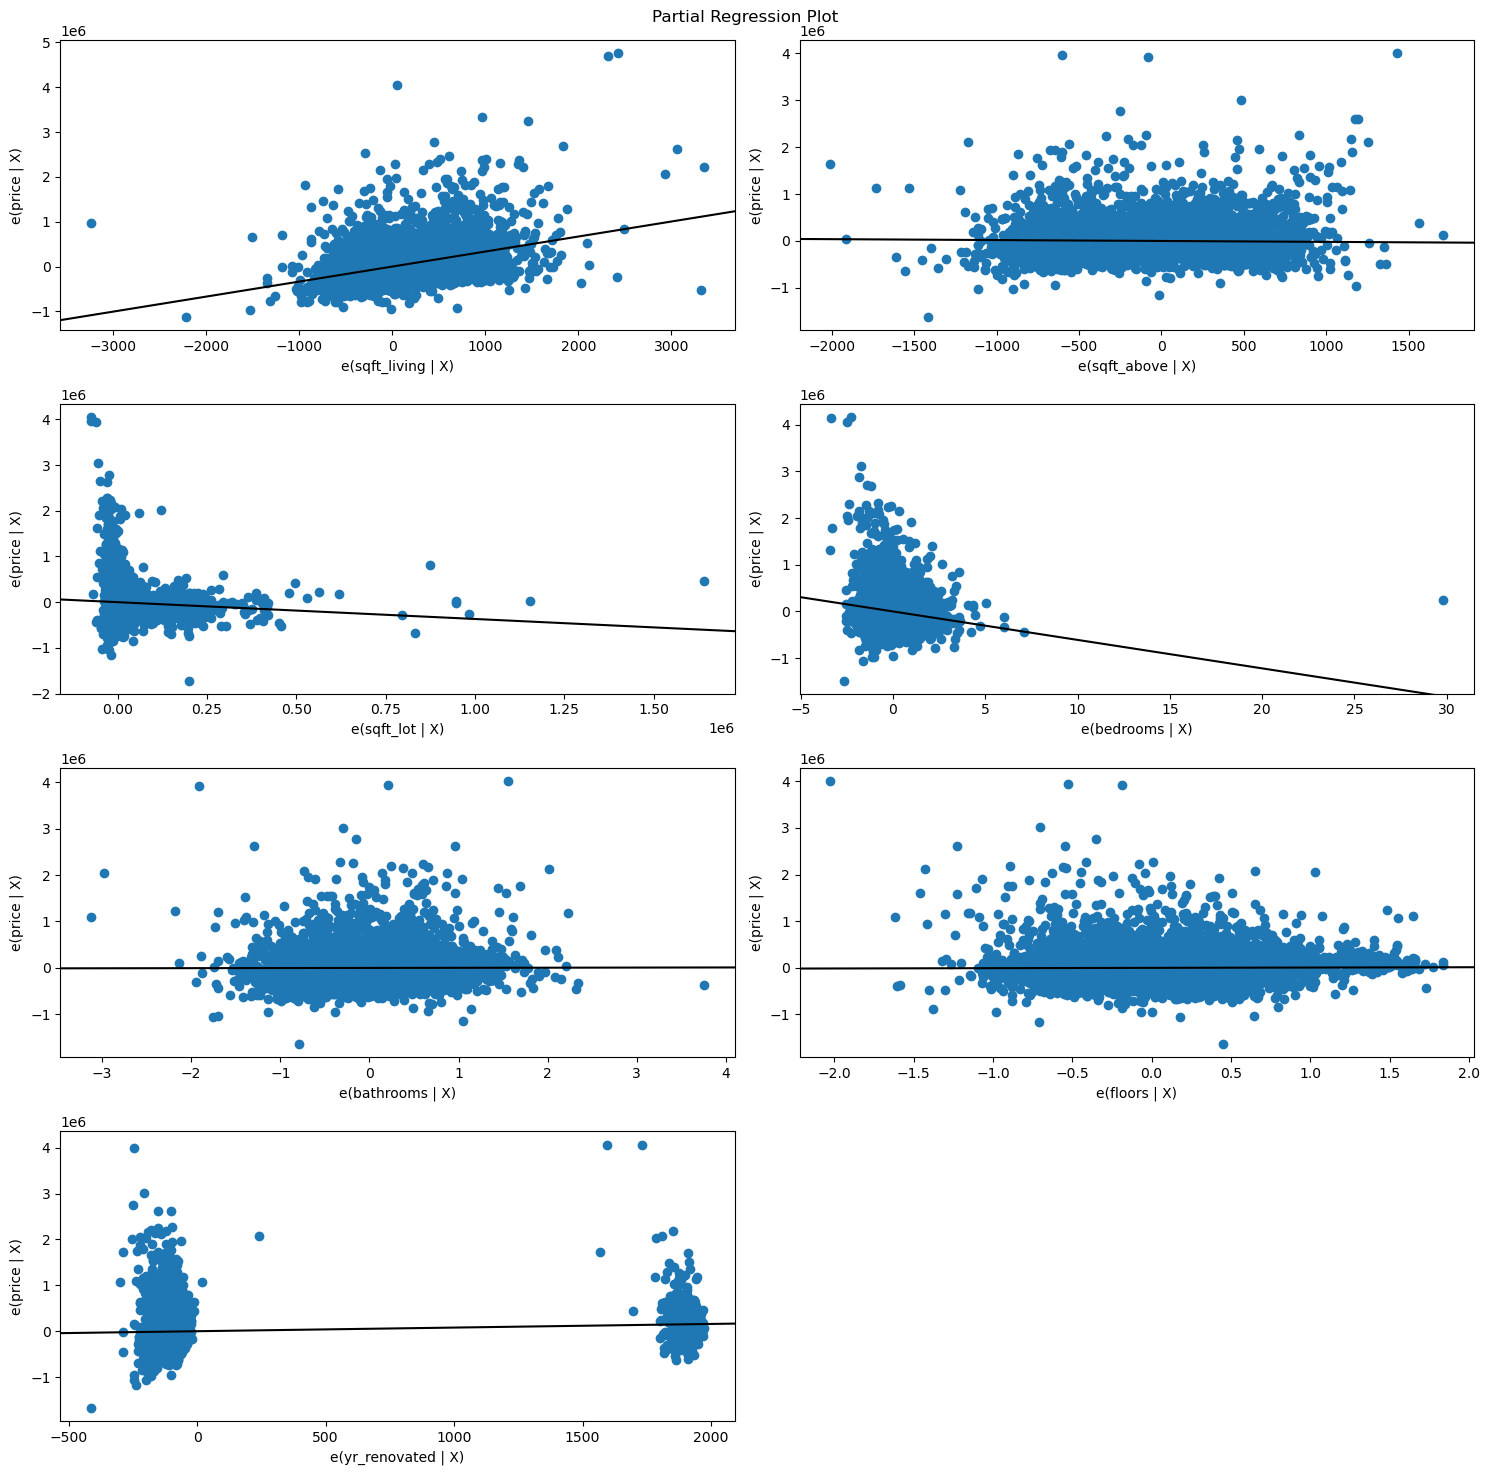

In [42]:
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(third_results, exog_idx=["sqft_living", "sqft_above","sqft_lot","bedrooms","bathrooms","floors","yr_renovated"], fig=fig)
plt.tight_layout()
plt.show()

From the graphs above we see that most features have a linear relationship with zero slope thus not beneficial to the model except the sqft_living, sqft_lot and bedrooms have a non zero slope thus beneficial to add it to the model. 

**5.REGRESSION RESULTS**

After analysing using both the coefficients and graphs of the models, the more befitting results were from the coefficients due to better understanding and easier interpretation. The following are the resuls:

From baseline model:
1. The model explains about 50% variance in price.
2. The model is statistically significant overall with an F-statistic p-value below 0.05
2. The model's coefficients(const and sqft_living) are both statistically significant with a t-statictic p-values below 0.05
3. For an increase in sqft_living there is an associate increase in price by 286.15.
4. If sqft_living = 0, the price would be expected to be -55,160.00

From second model:
1. The model is statistically significant overall, with an F-statistic p-value well below 0.05
1. The model explains about 50% variance in price.
2. The model coefficients(const, sqft_living and sqt_above) are statistically significant with a t-statictic p-values below   0.05
3. For an increase in sqft_living there is an associate increase in price by 296.44.\
   We see that there is an increase from the previous model therefore showing that sqft_above has a meaningful confounding in      the relationship between both sqft_living and price.
4. For an increase of 1 sqft_above, there is an associate decrease in price by -13.02.

From third model:
1. The model is statistically significant with a F-statistic p-value below 0.05
2. The model explains a 52.3% variance in price
   The R-squared increased by 2.3%
3. Most of the model coefficients are statistically significant:
   const, bedrooms, sqft_living, sqft_lot, yr_renovated and sqft_above have p-values below 0.05.
   bathrooms and floors have a coefficient greater than 0.05 meaning they have no effect on price thus statistically insignificant.
4. For an increase in sqft_living there is an associate increase in price by 335.\
   We see that there is an increase from the previous model therefore showing that other features have a meaningful confounding in the relationship between both sqft_living,sqft_above and price.

**6.CONCLUSION**

From assessing the three models using their coefficients rather than the graphs, there is an increase in the variation(R-Squared) from 50% to 52.3%.\
Though it is a small difference we can see that features such as bathrooms and floors, though with higher p-value than 0.05 have contributed to the increase in variance in price.\
We can conclude that upgrade of the features, such as , increasing bedrooms, sqft_lot, sqft_living and bathrooms increases the predicted target of price resulting in enhancment of livability, convience and becomes more appealing to buyers.\
Therefore, we reject our null hypothesis and accept the alternative.